# <center> <img src="../../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> **Procesamiento de Datos Masivos** </center>
---
### <center> **Primavera 2025** </center>
---
### <center> **Documentación** </center>

---
**Profesor**: Dr. Pablo Camarillo Ramirez

**Team Members**:

- Alberto Renteria Camacho
- Lorena Ruelas Gaytán
- Ximena Isaac Horta
- Yael Alejandro Rodríguez Barreto

---

## Introducción

El presente proyecto tiene como objetivo principal demostrar las competencias adquiridas durante el curso de Procesamiento de Datos Masivos, mediante el diseño y construcción de una aplicación escalable que aprovecha el poder de procesamiento distribuido de PySpark. Esta aplicación está orientada al análisis de flujos de datos en tiempo real provenientes de redes sociales, en cumplimiento con las 5V del Big Data: volumen, velocidad, variedad, veracidad y valor.
Entre las opciones de fuentes de datos sugeridas, se seleccionó "Social Media Feeds", enfocándose particularmente en la plataforma Twitter. Esta red social proporciona un flujo constante y diverso de datos públicos que pueden ser recolectados, procesados y analizados en tiempo real. La solución desarrollada se enfoca en construir una arquitectura robusta que permita recibir tweets, almacenarlos eficientemente y prepararlos para su análisis posterior con modelos de inteligencia artificial y herramientas de visualización como Power BI.


---

## Definición del Problema
El problema a resolver en este proyecto se centra en la necesidad de construir una arquitectura robusta y distribuida que permita recolectar, procesar y analizar flujos de datos provenientes de redes sociales en tiempo real, con la finalidad de extraer valor a partir de grandes volúmenes de información. La arquitectura propuesta se apoya en la integración de Apache Kafka, Apache Spark y modelos de aprendizaje automático, permitiendo cubrir tanto el procesamiento en tiempo real como el procesamiento por lotes.


---

## Arquitectura del sistema

<div style="width: 100%; display: flex; justify-content: left; align-items: flex-start; margin-top: 20px;">
  <div style="width: 70%; padding-right: 40px; font-size: 16px; line-height: 1.6; text-align: justify;">
    <p>
      La arquitectura del sistema se basa en un flujo distribuido de procesamiento de datos,
      compuesto por tres etapas principales: <strong>generación de datos</strong>,
      <strong>procesamiento en tiempo real</strong> y <strong>análisis por lotes</strong>.
      Esta estructura permite simular y analizar publicaciones de redes sociales con tecnologías Big Data
      y se ve reflejada en el diagrama.
    </p>
    <p>
      En la primera etapa, ubicada en el archivo <strong>producers.ipynb</strong>, se utilizan productores Kafka 
      para enviar mensajes a un clúster distribuido. Cada productor está asociado a un tópico 
      (<em>tweet-1</em> a <em>tweet-4</em>) y genera un mensaje cada 1.5 segundos. Para simular tweets 
      de forma realista, se emplea la librería <strong>Faker</strong>, que permite crear contenido textual 
      sintético con estructura similar a publicaciones reales. Estos mensajes se envían de forma concurrente 
      mediante técnicas de <strong>multihilo</strong>.
    </p>
    <p>
      En la segunda etapa, definida en <strong>consumer.ipynb</strong>, se configura un consumidor Kafka 
      conectado a <strong>Spark</strong>. Este módulo escucha los tópicos definidos, transforma los mensajes 
      recibidos en cadenas de texto y los almacena en formato <strong>Parquet</strong> en la ruta 
      <code>/home/jovyan/notebook/data/parquet</code>. Esta colección de archivos representa el <em>data lake</em> 
      del sistema, preparado para análisis posteriores.
    </p>
    <p>
      La tercera etapa, implementada en <strong>k_means.ipynb</strong>, corresponde al análisis por lotes mediante 
      <strong>aprendizaje automático no supervisado</strong>. Se inicia una sesión Spark, se carga la información 
      desde los archivos Parquet y se extrae el campo <code>value_str</code>, que contiene el contenido textual 
      de los tweets. Este se convierte en vectores de características para alimentar un modelo de 
      <strong>KMeans</strong>, el cual agrupa los datos en clústeres según su similitud. Este proceso permite 
      segmentar el contenido y extraer patrones sin requerir datos etiquetados.
    </p>
    <p>
      Esta arquitectura integra <strong>procesamiento en tiempo real</strong> (Kafka + Spark Streaming) con 
      <strong>análisis por lotes</strong> (Spark + Machine Learning), facilitando la gestión del flujo de datos 
      y preparando la información para ser visualizada en <strong>Power BI</strong>.
    </p>
  </div>
 <div style="width: 400px; display: flex; flex-direction: column; gap: 20px;">
    <img src="image.png" alt="Diagrama del sistema" style="max-width: 100%;">
    <img src="screenshot.png" alt="Captura de pantalla" style="max-width: 100%;">
  </div>

</div>


---

## Justificación 5Vs 

### Volumen
El sistema maneja grandes volúmenes de datos al generar continuamente mensajes (tweets sintéticos) cada 1.5 segundos desde cuatro productores Kafka, lo que genera una carga constante en el clúster distribuido.
Cada mensaje contiene texto con una estructura de publicación de red social, y es almacenado en formato Parquet, lo cual optimiza el almacenamiento y permite escalar el volumen.


### Velocidad

El sistema maneja grandes volúmenes de datos generados en tiempo real por cuatro productores Kafka, cada uno enviando un mensaje cada 1.5 segundos. Estos mensajes, que simulan publicaciones de redes sociales, son almacenados en formato Parquet.

Para cuantificar el volumen de datos generado, se realizó una prueba en la que se monitoreó el tamaño total de los archivos producidos y el tiempo transcurrido. A continuación, se detalla el cálculo:

- **Duración total de la ejecución:**
  - Primer bloque de tiempo: 9 minutos 30 segundos → `9×60 + 30 = 570 segundos`
  - Segundo bloque de tiempo: 4 minutos 45 segundos → `4×60 + 45 = 285 segundos`
  - **Total:** `570 + 285 = 855 segundos`
- **Tamaño total generado:** `4,120,851 bytes`

**Cálculo del rendimiento medio:**

(4,120,851 bytes) / (855 segundos) = 4,819.7 bytes/s


El rendimiento medio es de aproximadamente **4819.7 bytes/s**.

Este rendimiento indica que el sistema puede manejar un flujo sostenido de más de **4.8 KB por segundo**, y este volumen se incrementa proporcionalmente si se añaden más productores o se amplía el tiempo de ejecución.

#### Estimación de volumen de datos procesados

| # | Periodo de tiempo         | Datos procesados       |
|---|---------------------------|-------------------------|
| 0 | 1 Segundo                 | 4.82 KB                |
| 1 | 1 Minuto (60 segundos)    | 289.18 KB              |
| 2 | 1 Hora (3,600 segundos)   | 17.35 MB               |
| 3 | 1 Día (86,400 segundos)   | 416.42 MB              |
| 4 | 1 Año (31.5 millones s)   | 151.82 GB              |

### Variety
La aplicación demuestra el principio de Variety del Big Data al manejar datos semi-estructurados en tiempo real, generados en distintos formatos y gestionados a través de varias herramientas del ecosistema Big Data.
Específicamente:
-	Los datos consisten en texto generado aleatoriamente mediante la librería Faker, simulando publicaciones en redes sociales con estructura realista y diversa.
-	Estos mensajes se envían de forma continua a través de Kafka, en forma de eventos semi-estructurados que permiten incorporar distintos campos dentro del mismo mensaje.
-	Posteriormente, los datos son procesados por Spark Structured Streaming y almacenados en formato Parquet, que conserva el esquema de los datos, facilitando el análisis por lotes y la compatibilidad con herramientas externas como Power BI.


### Veracity
El sistema garantiza la calidad y precisión de los datos a través de las siguientes estrategias:
-	Generación controlada: El uso de la librería Faker asegura que los datos simulados tengan una estructura coherente y libre de errores tipográficos o inconsistencias semánticas.
-	Validación por Spark: Durante el procesamiento en tiempo real, Spark aplica validaciones automáticas de tipo de datos y formato. Cualquier mensaje que no cumpla con el esquema predefinido puede ser descartado o marcado para revisión.
-	Persistencia en formato Parquet: El uso del formato Parquet no solo optimiza el almacenamiento, sino que preserva la integridad del esquema, lo que reduce el riesgo de errores por manipulación posterior.
-	Agrupamiento por KMeans: La etapa de análisis por lotes puede detectar datos atípicos o inconsistentes al formar clústeres. Aquellos registros que no se agrupan correctamente podrían indicar anomalías a revisar.


### Value
El sistema genera y almacena datos que, aunque simulados, están estructurados de forma que permiten extraer valor práctico mediante análisis no supervisado. Las columnas almacenadas en los archivos Parquet alimentan un modelo de KMeans, que agrupa las publicaciones por similitud textual.
Los principales beneficios obtenidos son:
-	Segmentación automática del contenido: El análisis permite descubrir patrones de similitud entre publicaciones sin necesidad de etiquetarlas manualmente.
-	Identificación de temas o tendencias: Los clústeres pueden representar diferentes categorías de contenido, simulando cómo se podrían analizar conversaciones reales en redes sociales.
-	Visualización con Power BI: Los resultados del análisis por lotes se integran con Power BI, facilitando la exploración visual de los grupos, la frecuencia de aparición, y otros atributos derivados de los datos.


---

## Detalles de Implementación

La arquitectura del sistema se diseñó bajo un enfoque de **procesamiento distribuido en tiempo real y por lotes**, utilizando tecnologías del ecosistema Big Data que permiten simular, capturar, procesar y analizar publicaciones tipo redes sociales.


### Tecnologías Utilizadas

- **Apache Kafka**  
  Utilizado como sistema de mensajería distribuido para el envío y recepción de datos en tiempo real.  
  Se configuraron múltiples tópicos (`tweet-1` a `tweet-4`) para recibir mensajes simulados desde productores concurrentes.

- **PySpark (Spark Structured Streaming)**  
  Utilizado para consumir los mensajes provenientes de Kafka en tiempo real.  
  Se usó PySpark para transformar los datos, definir el esquema y almacenarlos en formato Parquet, lo que permite su posterior análisis.

- **Formato Parquet**  
  Seleccionado como formato de almacenamiento columnar por su eficiencia en lectura/escritura  
  y su compatibilidad con sistemas analíticos como Power BI.

- **Faker (Librería de Python)**  
  Empleada para la generación de contenido textual aleatorio con estructura similar  
  a publicaciones reales en redes sociales.

- **KMeans (Machine Learning con PySpark MLlib)**  
  Algoritmo no supervisado utilizado para analizar por lotes el contenido textual almacenado,  
  con el fin de identificar grupos de mensajes similares sin necesidad de etiquetas manuales.


### Decisiones de Diseño

- **Simulación multihilo de productores Kafka**  
  Se optó por usar hilos paralelos para cada productor, permitiendo enviar mensajes de forma concurrente  
  a diferentes tópicos. Esto simula un entorno realista de múltiples fuentes de datos.

- **Separación en notebooks independientes por etapa**  
  El sistema está modularizado en notebooks para una mayor claridad y mantenimiento:
  - `producers.ipynb`: generación y envío de mensajes.
  - `consumer.ipynb`: ingestión y almacenamiento.
  - `k_means.ipynb`: análisis por lotes.


---

## Resultados y Evaluación

### Funcionalidad de la Aplicación

La aplicación cumple satisfactoriamente con los objetivos definidos:

- Simular, procesar y analizar publicaciones tipo red social en un flujo continuo de datos.
- Implementar una arquitectura que combina procesamiento en tiempo real (**Kafka + Spark Streaming**) con análisis por lotes (**Spark MLlib**).
- Integrarse con herramientas de visualización como **Power BI** para permitir una interpretación accesible de los resultados.


### Pruebas por Componente

Cada componente del sistema fue probado de manera modular:

- **Productores Kafka**  
  Generan mensajes cada 1.5 segundos en tópicos distintos (`tweet-1` a `tweet-4`), simulando publicaciones sociales en tiempo real.

- **Consumidor Spark**  
  Lee los mensajes en tiempo real desde los tópicos de Kafka y los almacena exitosamente en archivos en formato **Parquet**, construyendo el *data lake* del sistema.

- **Módulo de Machine Learning**  
  Transforma el contenido textual en vectores de características y aplica un modelo de **KMeans**, agrupando los mensajes por similitud sin necesidad de etiquetas.


### Evaluación del Agrupamiento

Dado que se trata de un modelo no supervisado, no se calculan métricas clásicas como *precision*, *recall* o *accuracy*, ya que no se dispone de etiquetas reales.  
En su lugar, la evaluación se centra en:

- La **coherencia semántica** dentro de cada clúster.
- La **utilidad práctica** del agrupamiento para detectar patrones o tendencias.


### Dashboard de Resultados

A continuación, se presenta el **dashboard de Power BI** que visualiza los resultados del análisis:


1. Total Predictions
Significado: Muestra el total acumulado de predicciones.
Valor: Resume la magnitud del análisis realizado sobre los tweets.

2. Gráfico por Año/Trimestre/Mes
Significado: Suma de predicciones por mes.
Valor: Permite identificar tendencias o picos de actividad a lo largo del tiempo.

3. Gráfica circular por hashtags
Significado: Agrupa la suma de predicciones según los hashtags usados.
Valor: Identifica qué temas son más comunes o relevantes según el modelo.

4. Tabla de tweets con views y predicción
Significado: Lista los tweets con mayor predicción y sus vistas.
Valor: Muestra ejemplos clave para entender qué tipo de contenido está siendo más destacado por el modelo.

5. Gráfico por menciones
Significado: Muestra cuántas predicciones se asocian a cada mención (@usuario).
Valor: Detecta los usuarios más influyentes o más referenciados en el dataset.

6. Gráfico por user_id
Significado: Suma de predicciones por usuario que publicó el tweet.
Valor: Identifica qué usuarios están generando más contenido relevante según el modelo.

Todos los gráficos ayudan a analizar contenido, temporalidad, usuarios clave y engagement en los tweets, desde diferentes ángulos. Esto es útil para tomar decisiones de contenido o análisis de tendencias según los criterios del modelo de predicciones.

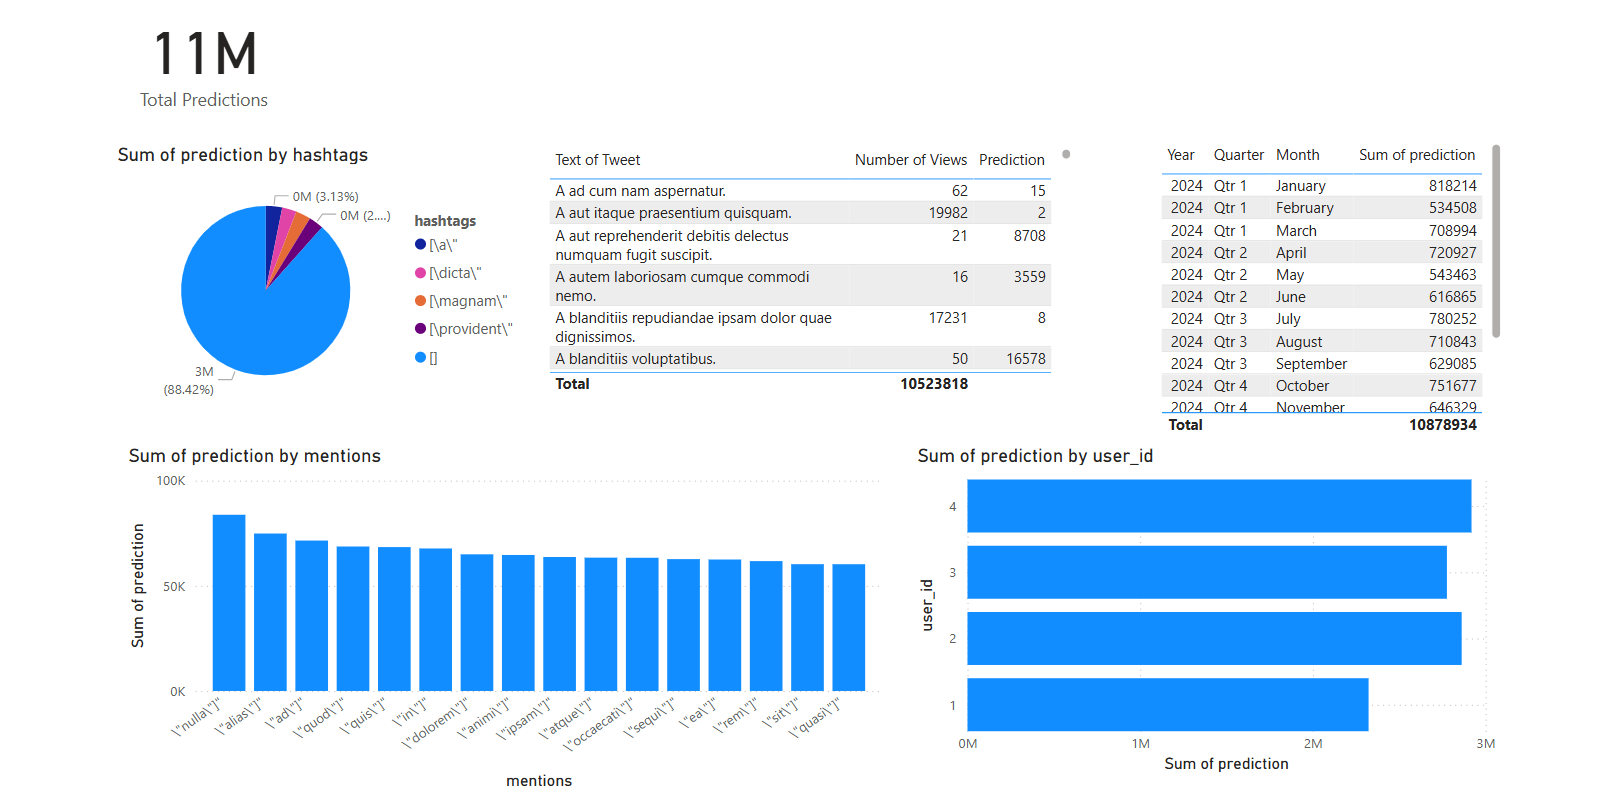



---

### Conclusión
A lo largo de este proyecto se desarrolló una solución basada en tecnologías Big Data capaz de simular, procesar y analizar publicaciones tipo redes sociales en un flujo continuo de datos. La integración de herramientas como Kafka, Spark Structured Streaming, almacenamiento en formato Parquet y un modelo de KMeans permitió construir un sistema escalable y adaptable a escenarios reales de procesamiento masivo de información.
Uno de los principales logros fue el diseño modular del sistema en tres etapas claras: generación de datos, procesamiento en tiempo real y análisis por lotes. Esta separación permitió evaluar y optimizar cada fase de forma independiente, facilitando la validación funcional y analítica del flujo de datos. Además, la integración con Power BI brindó una forma clara y accesible de visualizar los resultados del análisis.
Durante el desarrollo del proyecto, se profundizó en conceptos como el procesamiento distribuido, la gestión de flujos de datos en tiempo real y la aplicación de modelos de aprendizaje no supervisado. También se fortalecieron habilidades técnicas en áreas como programación concurrente y análisis de información de valor.
